In [ ]:
# knn classifier to predict if a patient has a heart disease given some features about the patient's health
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# the url only contains the data so we have to specify the names of the features 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'label']

data = pd.read_csv(url,names = names)

data.head()





,sepal-length,sepal-width,petal-length,petal-width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# split labels and features
x = data.iloc[:,:-1]
y = data.iloc[:,4]



In [ ]:
# splits the training data and the labels
# test set is 20% of the overall data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state =0)

In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# train model 
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
# Test data 
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [42]:
# try different values of k and see which one yields the least error 
error = []

for i in range(1,50):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train,y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))



In [45]:
print(error)

[0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.03333333333333333, 0.1, 0.13333333333333333, 0.13333333333333333, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.13333333333333333, 0.13333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.13333333333333333, 0.16666666666666666, 0.13333333333333333, 0.13333333333333333, 0.1, 0.13333333333333333, 0.13333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.2, 0.16666666666666666, 0.16666666666666666, 0.2]


Text(0, 0.5, 'error rate')

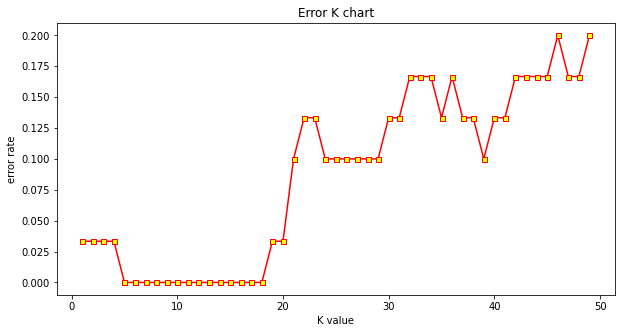

In [44]:
plt.figure(figsize=(10,5))
plt.plot(range(1,50),error,color = 'red', linestyle = 'solid', marker = 's',markerfacecolor='yellow', markersize = 5)
plt.title("Error K chart")
plt.xlabel("K value")
plt.ylabel("error rate")